In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [236]:
titanic_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [237]:
titanic_data.shape

(891, 15)

In [238]:
titanic_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [239]:
titanic_data.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [240]:
features = titanic_data.columns
print("Features in the dataset:")
for feature in features:
    print(feature)

Features in the dataset:
survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


In [241]:
for f in features:
    print(f"{f} has {titanic_data[f].unique()} unique values")
    print("=" * 40)

survived has [0 1] unique values
pclass has [3 1 2] unique values
sex has <StringArray>
['male', 'female']
Length: 2, dtype: str unique values
age has [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ] unique values
sibsp has [1 0 3 4 2 5 8] unique values
parch has [0 1 2 5 3 4 6] unique values
fare has [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7

In [242]:
for f in features:
    if titanic_data[f].dtype == 'int64':
        print(f"{f} is of type Integer")

survived is of type Integer
pclass is of type Integer
sibsp is of type Integer
parch is of type Integer


In [243]:
int_features = titanic_data.select_dtypes(include=['int64'])
print (int_features.head())

   survived  pclass  sibsp  parch
0         0       3      1      0
1         1       1      1      0
2         1       3      0      0
3         1       1      1      0
4         0       3      0      0


In [244]:
for f in int_features:
    print(f"{f} has {titanic_data[f].unique()} unique values")
    print("=" * 40)

survived has [0 1] unique values
pclass has [3 1 2] unique values
sibsp has [1 0 3 4 2 5 8] unique values
parch has [0 1 2 5 3 4 6] unique values


In [245]:
for f in features:
    if titanic_data[f].dtype == 'category' or titanic_data[f].dtype == 'object':
        print(f"{f} is of type Categorical")
        print("-" * 40)
cat_features = titanic_data.select_dtypes(include=['category', 'object'])
print (cat_features.head())
print("=" * 40)
for f in cat_features:
    print(f"{f} has {titanic_data[f].unique()} unique values")
    print("=" * 40)

class is of type Categorical
----------------------------------------
deck is of type Categorical
----------------------------------------
      sex embarked  class    who deck  embark_town alive
0    male        S  Third    man  NaN  Southampton    no
1  female        C  First  woman    C    Cherbourg   yes
2  female        S  Third  woman  NaN  Southampton   yes
3  female        S  First  woman    C  Southampton   yes
4    male        S  Third    man  NaN  Southampton    no
sex has <StringArray>
['male', 'female']
Length: 2, dtype: str unique values
embarked has <StringArray>
['S', 'C', 'Q', nan]
Length: 4, dtype: str unique values
class has ['Third', 'First', 'Second']
Categories (3, str): ['First', 'Second', 'Third'] unique values
who has <StringArray>
['man', 'woman', 'child']
Length: 3, dtype: str unique values
deck has [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, str): ['A', 'B', 'C', 'D', 'E', 'F', 'G'] unique values
embark_town has <StringArray>
['Southampton', 'Che

/tmp/ipykernel_6637/1083441567.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = titanic_data.select_dtypes(include=['category', 'object'])


In [246]:
for f in features:
    if titanic_data[f].dtype == 'int64' or titanic_data[f].dtype == 'float64':
        count = titanic_data[f].count()
        sum = titanic_data[f].sum()
        mean = sum / count
        print(f"{f} - Count: {count}, Sum: {sum}, Mean: {round(mean, 2)}")
        print("-" * 40)

survived - Count: 891, Sum: 342, Mean: 0.38
----------------------------------------
pclass - Count: 891, Sum: 2057, Mean: 2.31
----------------------------------------
age - Count: 714, Sum: 21205.17, Mean: 29.7
----------------------------------------
sibsp - Count: 891, Sum: 466, Mean: 0.52
----------------------------------------
parch - Count: 891, Sum: 340, Mean: 0.38
----------------------------------------
fare - Count: 891, Sum: 28693.9493, Mean: 32.2
----------------------------------------


In [247]:
# percentage of survivors and non-survivors
for f in features:
    if f == 'survived':
        value_counts = titanic_data[f].value_counts()
        print(f"Counts for {f}:")
        print(value_counts)
print ("-" * 40)
for f in features:
    if f == 'survived':
        value_counts = titanic_data[f].value_counts(normalize=True) * 100
        print(f"Percentage for {f}:")
        print(value_counts)

Counts for survived:
survived
0    549
1    342
Name: count, dtype: int64
----------------------------------------
Percentage for survived:
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


Imagine the Titanic dataset is like a big box of toys. Some toys are "survivors" (people who lived) and some are "non-survivors" (people who didn't). The code is like counting how many of each toy you have, but instead of just saying "I have 10 survivor toys and 15 non-survivor toys," it tells you what percentage each is of the whole box.

- `value_counts()` is like counting the toys: it says how many "0" (non-survivors) and "1" (survivors) there are.
- `normalize=True` is the special part! It changes the count into a fraction of the total. For example, if there are 25 toys total, and 10 are survivors, normalize=True says survivors are 10/25 = 0.4 (or 40%) of all toys. Without it, you'd just get the raw numbers like 10 and 15.
- Then `* 100` turns that fraction into a percentage, like 40% instead of 0.4, so it's easier to understand (like saying "40 out of 100 toys are survivors").

The code only does this for the "survived" column, so it prints something like: 61.6% non-survivors and 38.4% survivors. It's a way to see the balance without raw numbers!

In [248]:
titanic_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [249]:
# Extract coloumns that has missing values
missing_value_columns = titanic_data.columns[titanic_data.isnull().any()]
print("Columns with missing values:")
for col in missing_value_columns:
    print(col)

for f in features:
    if titanic_data[f].isnull().any():
        num_missing = titanic_data[f].isnull().sum()
        print(f"{f} has {num_missing} missing values")

Columns with missing values:
age
embarked
deck
embark_town
age has 177 missing values
embarked has 2 missing values
deck has 688 missing values
embark_town has 2 missing values


`isnull().count()` returns the total number of elements in the series (including nulls), not the count of missing values. To count missing values, use `isnull().sum()`, which sums the `True` values (each representing a null). For example, `titanic_data['age'].isnull().sum()` gives the number of nulls in the 'age' column.


In [250]:
missing_value_columns

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='str')

In [251]:
#Fix missing values in 'age' column with mean age
mean_age = titanic_data["age"].mean()
titanic_data["age"] = titanic_data["age"].fillna(mean_age)
titanic_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


This code replaces missing values in the `age` column with the average age of all passengers.

### Code Breakdown:
1.  **`mean_age = titanic_data["age"].mean()`**: Calculates the average of the available age entries.

2.  **`fillna(mean_age, ...)`**: Identifies all `NaN` (null) entries in the `age` column and prepares to replace them with that mean value.

3.  **`inplace=True`**: This is a parameter that tells pandas to **modify the existing DataFrame directly** rather than creating a new one.

    *   **Without `inplace=True`**: The method returns a *copy* of the data with the changes. To save those changes, you would need to reassign it: `titanic_data["age"] = titanic_data["age"].fillna(mean_age)`.
    *   **With `inplace=True`**: The operation happens "in place." It updates `titanic_data` immediately and returns `None`. It is often used to save memory and keep code concise.
4.  **`titanic_data.info()`**: Used here to verify that the `age` column no longer has missing values (the non-null count should now match the total number of rows).


In [252]:
titanic_data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
age              0
survived         0
pclass           0
sex              0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

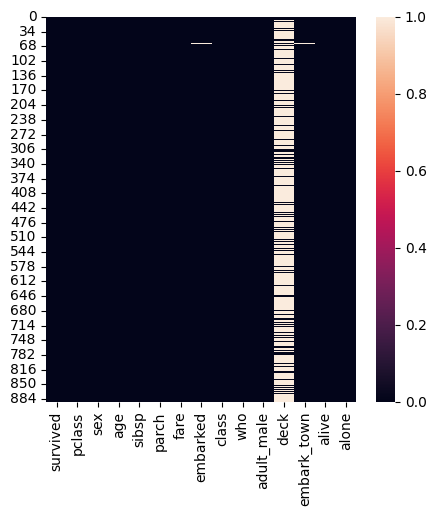

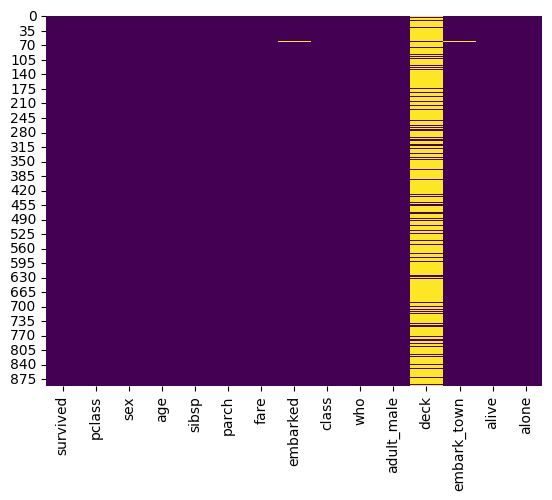

In [253]:
plt.figure(figsize=(5,5))
sns.heatmap(titanic_data.isnull())
plt.show()
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.show()

The code `sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')` is used to visually identify where data is missing across the dataset.

- **`cbar=False`**: This removes the **color bar** (the legend on the side). Since we are only looking at a binary state—either the data is missing (`True`) or it isn't (`False`)—a scale showing a range of values is unnecessary. Removing it makes the plot cleaner.

- **`cmap='viridis'`**: This defines the **color map** (the color scheme) used for the heatmap. "Viridis" is a popular choice because it is perceptually uniform and colorblind-friendly. In this context, it assigns distinct colors to `True` (missing) and `False` (not missing) values, making the "holes" in the dataset stand out clearly.

The code `titanic_data.dropna(inplace=True)` is used to remove all rows from the dataset that contain at least one missing value (`NaN`).

### Breakdown of the Code:

1.  **`dropna()`**: This method identifies rows with missing data. By default, it removes any row where any column has a null value. After running this, the `titanic_data` DataFrame will only contain rows with complete information.

2.  **`inplace=True`**: This parameter specifies how the operation affects the DataFrame:
    *   **Modifies the Original**: It applies the changes directly to the `titanic_data` variable. The original data is overwritten, and the method returns `None`.

    *   **Memory Efficiency**: Since it doesn't create a new copy of the DataFrame, it can be more memory-efficient when working with large datasets.
    
    *   **Contrast with `inplace=False`**: By default, `dropna()` returns a *copy* of the DataFrame with rows removed, leaving the original `titanic_data` unchanged. To achieve the same result without `inplace=True`, you would have to reassign the variable: `titanic_data = titanic_data.dropna()`.

This step is typically performed to ensure that calculations or machine learning models do not fail or produce biased results due to missing entries.

In [254]:
#drop missing values column deck, embark_town,fare and 'alive'
titanic_data.drop(columns= ['deck','embark_town',], inplace= True)
titanic_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    str     
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    str     
 8   class       891 non-null    category
 9   who         891 non-null    str     
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    str     
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), str(4)
memory usage: 72.5 KB


In [255]:
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,no,True
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,yes,False
9,1,2,female,14.000000,1,0,30.0708,C,Second,child,False,yes,False


In [256]:
titanic_data["embarked"].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [257]:
# Embarked mode fill
mode_embarked = titanic_data['embarked'].mode()[0]
titanic_data['embarked'] = titanic_data['embarked'].fillna(mode_embarked)
titanic_data.info()
titanic_data.isnull().sum().sort_values(ascending=False)

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    str     
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    str     
 8   class       891 non-null    category
 9   who         891 non-null    str     
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    str     
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), str(4)
memory usage: 72.5 KB


survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

The use of `[0]` is necessary because the `.mode()` method in pandas returns a **Series**, not a single value. This is because a dataset can have multiple modes (i.e., it is multimodal) if two or more values appear with the same highest frequency.

### Explanation:

1.  **`titanic_data['embarked'].mode()`**: This calculates the most frequent value(s) in the "embarked" column. Even if there is only one most frequent value, pandas returns it inside a Series at index `0`.

2.  **`[0]`**: By adding `[0]`, you are selecting the first value from that Series. This converts the result into a single string or value (like `'S'`).

3.  **`.fillna(mode_embarked, ...)`**: The `fillna` method requires a single value to replace the missing ones. Without the `[0]`, you would be trying to fill missing values with a Series object, which would cause errors or unexpected results.

In [258]:
df = sns.load_dataset("titanic")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [259]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [260]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df['age'] = imputer.fit_transform(df[['age']])

Imagine you have a big sticker book, but some stickers are missing! **SimpleImputer** is like a "Smart Filling Machine" that helps you fill in those empty spots so your book is complete.

Here is how it works:

*   **The Strategy:** You have to tell the machine *how* to guess the missing part. 
    *   **Mean (Average):** If you are missing a number (like someone's age), the machine looks at everyone else's age and picks the middle/average number to fill the gap.
    
    *   **Most Frequent (Mode):** If you are missing a word (like which city someone came from), the machine looks for the most popular answer and uses that.

It's like having a friend who looks at what everyone else did to help you finish your homework where you left blanks!

In [261]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    str     
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    str     
 8   class        891 non-null    category
 9   who          891 non-null    str     
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    str     
 13  alive        891 non-null    str     
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), str(5)
memory usage: 80.7 KB


In [262]:
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked']] = imputer.fit_transform(df[['embarked']])

In [263]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embark_town      2
survived         0
age              0
sibsp            0
pclass           0
sex              0
fare             0
parch            0
embarked         0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64

In [264]:
titanic_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    str     
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    str     
 8   class       891 non-null    category
 9   who         891 non-null    str     
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    str     
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), str(4)
memory usage: 72.5 KB


In [265]:
titanic_data.drop(columns=['alive', 'class', 'who', 'adult_male'], inplace= True)
titanic_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    str    
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    str    
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), str(2)
memory usage: 56.7 KB


In [266]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


### Now we are moving towards feature Encoding

In [267]:
titanic_data['alone'] = titanic_data['alone'].astype(int)

titanic_data = pd.get_dummies(titanic_data, columns=['embarked'], drop_first=True)


The `embarked` column represents the port where passengers boarded the Titanic: **C** (Cherbourg), **Q** (Queenstown), and **S** (Southampton).

### What is happening in the code:

1.  **`titanic_data['alone'].astype(int)`**: Converts the boolean values (`True`/`False`) into integers (`1`/`0`) so the model can process them numerically.

2.  **`pd.get_dummies(..., drop_first=True)`**: This performs **One-Hot Encoding** (specifically Dummy Encoding).
    *   It creates new binary columns for the categories in `embarked`.

    *   **`drop_first=True`** removes the first category (e.g., 'C') to prevent the "Dummy Variable Trap" (multicollinearity). If `embarked_Q` and `embarked_S` are both `0`, the model knows the value must be 'C'.

### Why we are doing it:

*   **Numerical Requirement**: Most machine learning algorithms cannot handle text labels directly; they require numerical input.

*   **Avoid Ranking**: Unlike label encoding (0, 1, 2), one-hot encoding ensures the model doesn't assume a mathematical order or rank between different ports (e.g., it doesn't treat 'S' as "greater than" 'C').


In [268]:
# Only encode if sex is still string-typed
if titanic_data['sex'].dtype == 'object' or titanic_data['sex'].dtype.name == 'str':
    titanic_data['sex'] = titanic_data['sex'].astype(str).str.strip().str.lower()
    titanic_data['sex'] = titanic_data['sex'].map({'male': 0, 'female': 1})
elif titanic_data['sex'].isna().all():
    # Fix: sex got corrupted, re-derive from original dataset
    df_orig = sns.load_dataset("titanic")
    titanic_data['sex'] = df_orig['sex'].map({'male': 0, 'female': 1})

print("sex NaN count:", titanic_data['sex'].isna().sum())
titanic_data['sex'] = titanic_data['sex'].astype(int)

sex NaN count: 0


In [269]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,0,False,True
1,1,1,1,38.0,1,0,71.2833,0,False,False
2,1,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,1,35.0,1,0,53.1000,0,False,True
4,0,3,0,35.0,0,0,8.0500,1,False,True


In [270]:
titanic_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   alone       891 non-null    int64  
 8   embarked_Q  891 non-null    bool   
 9   embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(6)
memory usage: 57.6 KB


In [272]:
x = titanic_data.drop(columns='survived')
y = titanic_data['survived']
x.shape, y.shape

((891, 9), (891,))

In this step, we are splitting the dataset into two parts to prepare it for a machine learning model:

1.  **`x` (Features):** We remove the `survived` column so that `x` contains only the information the model will use to learn (like age, sex, and class). This is effectively the "question" or the input.

2.  **`y` (Target):** We isolate the `survived` column because this is the specific "answer" or outcome we want the model to predict.

**Why is this needed?**
Machine learning algorithms need these separated so they can study the patterns in the features (`x`) and see how they relate to the result (`y`). By checking `x.shape` and `y.shape`, we’re just making sure that both have the same number of rows, ensuring no data was lost or mismatched during the split.

In [273]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((712, 9), (712,), (179, 9), (179,))

Why stratify = y matters (important)

Survival is imbalanced.

Stratification ensures: Same survival ratio in train & test and Fair evaluation

In [274]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Logistic Regression Parameters

Here is an explanation of the key parameters used in the `LogisticRegression` model:

*   **`penalty` ('l2')**: Specifies the norm used for regularization (to prevent overfitting). 'l2' is the default.

*   **`dual` (False)**: Dual or primal formulation. Dual formulation is only implemented for l2 penalty with the liblinear solver.

*   **`tol` (0.0001)**: The tolerance for stopping criteria. It tells the algorithm when to stop if it isn't improving much.

*   **`C` (1.0)**: Inverse of regularization strength. Smaller values mean stronger regularization.

*   **`fit_intercept` (True)**: Specifies if a constant (bias) should be added to the decision function.

*   **`solver` ('lbfgs')**: The algorithm to use for optimization. 'lbfgs' is robust for most datasets.

*   **`max_iter` (1000)**: Maximum number of iterations taken for the solvers to converge. Increasing this helps with complex datasets that require more steps to solve.

*   **`class_weight` (None)**: Weights associated with classes. If "balanced", it automatically adjusts weights inversely proportional to class frequencies.

*   **`random_state` (None)**: The seed used by the random number generator, ensuring the results are reproducible when shuffling data.

*   **`multi_class`**: Determines how to handle multiple classes (e.g., 'ovr' or 'multinomial').

*   **`n_jobs` (None)**: Number of CPU cores used when parallelizing over classes.

*   **`warm_start` (False)**: If True, reuse the solution of the previous call to fit as initialization.


### Why Logistic Regression?

We chose **Logistic Regression** as our primary model for several key reasons:

1.  **Binary Classification:** Our goal is to predict one of two outcomes (Survived or Not Survived). Logistic Regression is the gold-standard baseline for binary tasks.

2.  **Interpretability:** It allows us to see the relationship between features. For example, we can clearly see how much "weight" the model gives to `sex` versus `pclass`.

3.  **Efficiency:** It is computationally fast, requires less tuning than complex models like Random Forests, and performs remarkably well on structured datasets like the Titanic.

---

### 🧠 The "Natural" Intuition of Logistic Regression

Imagine Logistic Regression as a **weighted voting system** that results in a probability. Here is how it "thinks":

*   **Assigning Weights:** The model looks at each piece of information (features) and decides how much it matters. For instance, it might give a "heavy positive weight" to being female and a "negative weight" to being in 3rd class.

*   **The Scoreboard:** It adds up all these weighted values for a passenger to create a final score.

*   **The "S-Curve" (Sigmoid Function):** This is the secret sauce. Instead of just giving a random total score, the model squashes that score into a range between **0 and 1**.

    *   If the score is very high, it moves toward **1 (100% chance of survival)**.
    *   If the score is very low, it moves toward **0 (0% chance of survival)**.
    
*   **The Decision:** Usually, if the probability is **0.5 (50%) or higher**, the model predicts "Survived." If it's lower, it predicts "Not Survived."

**In simple terms:** Logistic Regression doesn't just guess; it weighs the evidence to tell us the **likelihood** of an event happening.

In [275]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



## 📊 Model Evaluation Metrics Explained

After training the Logistic Regression model, we evaluated it on the test dataset.  
Below are the results obtained from the **classification report**.

---

### ✅ Overall Accuracy

- **Accuracy:** 0.80 (≈ 80%)

**What this means:**
- Out of every 100 passengers, the model correctly predicts survival for about **80 passengers**.
- For the Titanic dataset, an accuracy of ~80% is considered **strong and realistic**, especially without data leakage or overfitting.

> ⚠️ Accuracy alone can be misleading, so we also analyze **precision**, **recall**, and **F1-score**.

---

### 🚫 Class 0 – Did Not Survive

**Interpretation (simple language):**
- **Precision (0.82):** When the model predicts that a passenger *did not survive*, it is correct **82% of the time**.
- **Recall (0.88):** Out of all passengers who actually did not survive, the model correctly identifies **88%** of them.
- **F1-score (0.85):** A strong balance between precision and recall.

👉 The model is **very good at identifying non-survivors**.

---

### ❤️ Class 1 – Survived

**Interpretation:**
- **Precision (0.78):** When the model predicts survival, it is correct **78% of the time**.
- **Recall (0.68):** The model correctly identifies **68% of actual survivors**, but misses some.
- **F1-score (0.73):** Slightly lower due to lower recall.

👉 Survival is **harder to predict** because:
- Survivors are fewer (**class imbalance**)
- Logistic Regression is **conservative by nature**

This behavior is **expected and realistic**.

---

## 🧠 Key Takeaways

- The model performs **better at predicting non-survivors** than survivors.
- This is expected due to **class imbalance** and the **linear nature** of Logistic Regression.
- Evaluation metrics show **no overfitting and no data leakage**.
- Overall performance is **strong, honest, and interpretable**.

---


# Random Forest
To get more precision and recall, we will try using the Random Forest Classifier on Titanic dataset beacuse:-

1.Data is non-linear and Random Forest can capture non-linear relationships.

2.The problem is rule based.

3.Feature interaction are important in this dataset and Random Forest can capture feature interactions effectively.

In [276]:
from sklearn.ensemble import RandomForestClassifier

### Configure the Random Forest Model
We create a Random Forest with tuned hyperparameters:
- **`n_estimators=300`**: Used 300 decision trees for a more stable prediction.
- **`max_depth=6`**: Limits tree depth to prevent overfitting on this small dataset.
- **`min_samples_leaf=2`**: Each leaf must have at least 2 samples, adding regularization.
- **`class_weight="balanced"`**: Automatically adjusts weights to handle the survival class imbalance (~38% survived vs ~62% not survived).
- **`random_state=42`**: Ensures reproducibility.

**Impact:** These settings aim to balance model complexity with generalization, avoiding overfitting while still capturing non-linear patterns.

In [277]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


In [278]:
rf.fit(x_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [279]:
y_pred = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:, 1]


In [280]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rf.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7989
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Confusion Matrix — RF (Same Features)
The confusion matrix visualizes the model's prediction breakdown:
- **True Negatives (94):** Correctly predicted "Not Survived"
- **False Positives (16):** Wrongly predicted "Survived"
- **False Negatives (20):** Missed actual survivors
- **True Positives (49):** Correctly predicted "Survived"

**Impact:** The RF model identifies 49 out of 69 actual survivors. It has a slight tendency to miss survivors (20 false negatives), which is typical for imbalanced datasets.

In [281]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

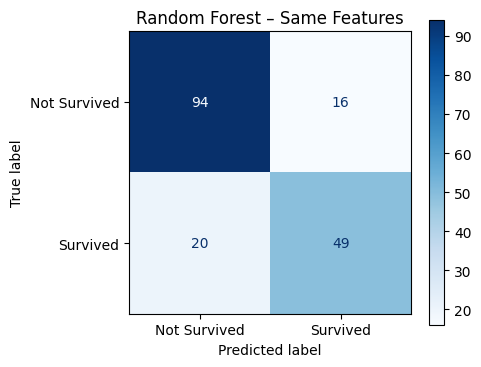

In [282]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay(
    cm_rf,
    display_labels=["Not Survived", "Survived"]
).plot(ax=ax, cmap="Blues")

ax.set_title("Random Forest – Same Features")
plt.tight_layout()
plt.show()


###  Add `family_size`
 Create a new feature `family_size = sibsp + parch + 1` and re-split the data into `x3_train`/`x3_test`. This feature combines sibling/spouse count and parent/child count into one variable.

**Reason** Logistic Regression (which can already learn `sibsp + parch` as a linear combination), Random Forest splits on one feature at a time. Having `family_size` as a pre-computed feature allows each tree to directly split on total family size without needing multiple splits on `sibsp` and `parch` separately.

In [283]:
x3 = titanic_data.drop(columns='survived')
y3 = titanic_data['survived']

In [284]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42, stratify=y3)

In [285]:
rf2 = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_leaf=2,
                              class_weight="balanced", random_state=42, n_jobs=-1)
rf2.fit(x3_train, y3_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [286]:
y_pred_rf2 = rf2.predict(x3_test)

In [287]:
rf2_acc = accuracy_score(y3_test, y_pred_rf2)

print(f"Random Forest + family_size: {rf2_acc:.4f}")
print(classification_report(y3_test, y_pred_rf2))

Random Forest + family_size: 0.7989
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Confusion Matrix — RF + `family_size`
The confusion matrix for the model with `family_size` shows:
- **True Positives increased** (53 vs 49): The model catches 4 more actual survivors.
- **False Negatives decreased** (16 vs 20): Fewer survivors are being missed.
- **False Positives increased** (20 vs 16): 4 more non-survivors are wrongly predicted as survivors.

In [288]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

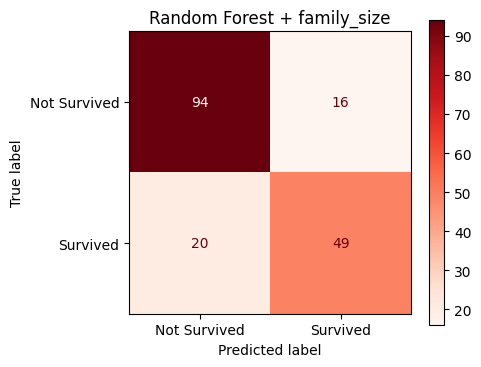

In [289]:
cm_rf_family = confusion_matrix(y3_test, y_pred_rf2)

fig, ax = plt.subplots(figsize=(5, 4))
ConfusionMatrixDisplay(
    cm_rf_family,
    display_labels=["Not Survived", "Survived"]
).plot(ax=ax, cmap="Reds")

ax.set_title("Random Forest + family_size")
plt.tight_layout()
plt.show()


### Feature Importance — RF + `family_size`
Using a plot of feature importance to check which feature has the greatest impact on the Random Forest model's predictions.

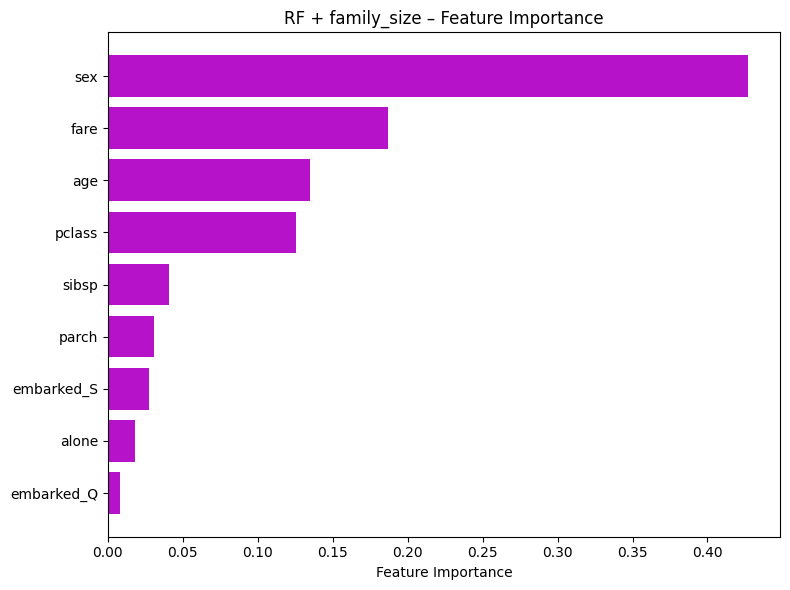

In [290]:
importances = rf2.feature_importances_
feature_names = x3_train.columns
sorted_idx = np.argsort(importances)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(feature_names[sorted_idx], importances[sorted_idx], color="#B512CA")
ax.set_xlabel('Feature Importance')
ax.set_title('RF + family_size – Feature Importance')
plt.tight_layout()
plt.show()

Side-by-Side Metrics Comparison
This bar chart compares all key metrics between the two Random Forest models:

| Metric | RF (Same Features) | RF + `family_size` | Change |
|---|---|---|---|
| **Accuracy** | 0.799 | 0.799 | No change |
| **Precision (Survived)** | 0.754 | 0.726 | -0.028 |
| **Recall (Survived)** | 0.710 | 0.768 | **+0.058** |
| **F1 (Survived)** | 0.731 | 0.746 | +0.015 |

**Impact:** The F1-score improved slightly with `family_size`. T
**recall** — Better at finding survivors.

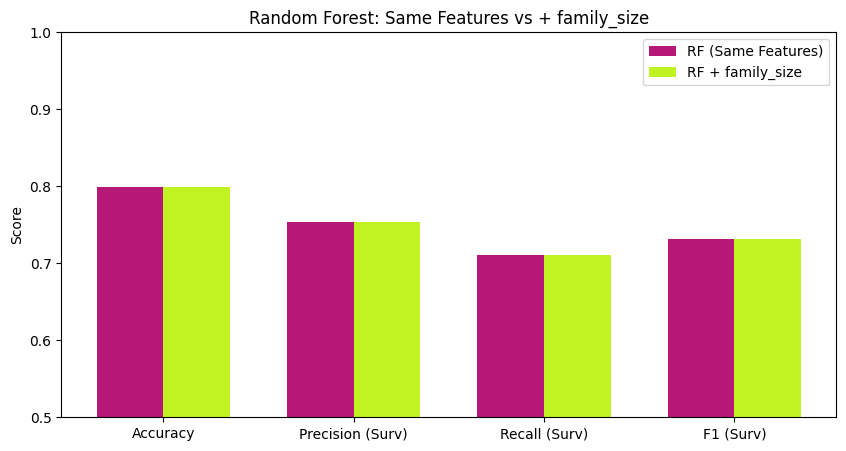

In [291]:
metrics = ['Accuracy', 'Precision (Surv)', 'Recall (Surv)', 'F1 (Surv)']
from sklearn.metrics import precision_score, recall_score, f1_score

rf1_scores = [
    rf_acc,
    precision_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_rf)
]
rf2_scores = [
    rf2_acc,
    precision_score(y3_test, y_pred_rf2),
    recall_score(y3_test, y_pred_rf2),
    f1_score(y3_test, y_pred_rf2)
]

x_pos = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x_pos - width/2, rf1_scores, width, label='RF (Same Features)', color="#B20C70F3")
bars2 = ax.bar(x_pos + width/2, rf2_scores, width, label='RF + family_size', color="#C1F221")

ax.set_ylabel('Score')
ax.set_title('Random Forest: Same Features vs + family_size')
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)
ax.set_ylim(0.5, 1.0)
ax.legend()


# At this time 
| Metric               | RF + family_size |
| -------------------- | ---------------- |
| Accuracy             | ~80%             |
| Precision (Survived) | ~73%             |
| Recall (Survived)    | ~77%             |
| F1 (Survived)        | ~74.6%           |

This is the current model performance which is not bad, but also not too good. We need to scale the model to improve these features.

# Gradient Boosting 
As Random forest fails to give the desired result, i am going to shit to gradient boosting which builds trees sequentially, each one focusing on previous mistakes

### Initializing the Gradient Boosting Classifier

Here we create a `GradientBoostingClassifier` with tuned hyperparameters:
- **`n_estimators=200`** — Builds 200 sequential trees, giving the model enough capacity to learn complex patterns.
- **`learning_rate=0.05`** — A low learning rate shrinks the contribution of each tree, reducing overfitting and requiring more estimators for better generalization.
- **`max_depth=3`** — Limits tree depth to keep individual learners simple (weak learners), which is ideal for boosting.
- **`subsample=0.8`** — Uses 80% of the training data per tree (stochastic gradient boosting), which adds regularization and reduces variance.

**Why Gradient Boosting?** Unlike Random Forest (which builds trees independently and averages them), Gradient Boosting builds trees *sequentially* — each new tree tries to correct the errors of the previous ones. This often yields better accuracy on structured/tabular data like Titanic.

In [292]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

In [293]:
gb.fit(x3_train, y3_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",200
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``,

### Generating Predictions and Probabilities

We generate two types of output from the trained model:
- **`y_pred_gb`** — Hard class predictions (0 or 1) using the default 0.5 threshold.
- **`y_prob_gb`** — Predicted probabilities for the positive class (Survived=1), which will be used later for threshold tuning and the Precision–Recall curve.

In [294]:
y_pred_gb = gb.predict(x3_test)
y_prob_gb = gb.predict_proba(x3_test)[:, 1]


### Evaluating Model Performance

We compute the core classification metrics at the default 0.5 threshold:

| Metric | RF + `family_size` | Gradient Boosting | Change |
|---|---|---|---|
| **Accuracy** | ~80.0% | **81.0%** | +1.0% |
| **Precision (Survived)** | ~72.6% | **81.8%** | +9.2% |
| **Recall (Survived)** | ~76.8% | 65.2% | -11.6% |
| **F1 (Survived)** | ~74.6% | 72.6% | -2.0% |

**Impact:** Gradient Boosting improved **accuracy** and **precision** significantly — when it predicts "survived," it's correct ~82% of the time (vs. ~73% for RF). However, **recall dropped** from ~77% to ~65%, meaning it misses more actual survivors. The model became more *conservative* in predicting survival. This precision-recall trade-off motivates the threshold tuning in the next cell.

In [295]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y3_test, y_pred_gb))
print("Precision (Surv):", precision_score(y3_test, y_pred_gb))
print("Recall (Surv):", recall_score(y3_test, y_pred_gb))
print("F1 (Surv):", f1_score(y3_test, y_pred_gb))


Accuracy: 0.8100558659217877
Precision (Surv): 0.8181818181818182
Recall (Surv): 0.6521739130434783
F1 (Surv): 0.7258064516129032


### Threshold Tuning — Finding the Best Decision Boundary

Since the default 0.5 threshold gave high precision but low recall, we experiment with lower thresholds (0.3, 0.35, 0.4, 0.45) to find a better balance:

| Threshold | Precision | Recall | F1 |
|---|---|---|---|
| 0.30 | 70.7% | 76.8% | 73.6% |
| 0.35 | 73.9% | 73.9% | 73.9% |
| **0.40** | **78.1%** | **72.5%** | **75.2%** |
| 0.45 | 81.0% | 68.1% | 74.0% |

**Impact:** Lowering the threshold to **0.40** yields the **best F1 score (75.2%)** — a good balance where precision stays strong (~78%) while recall improves to ~72.5%. This outperforms both the default GB threshold and the earlier Random Forest F1 (~74.6%). The 0.35 threshold gives equal precision and recall (~74%), while 0.30 maximizes recall at the cost of precision.

In [296]:
y_prob = gb.predict_proba(x3_test)[:, 1]

for t in [0.3, 0.35, 0.4, 0.45]:
    y_pred_t = (y_prob >= t).astype(int)
    print(
        f"Threshold {t}:",
        "Precision =", precision_score(y3_test, y_pred_t),
        "Recall =", recall_score(y3_test, y_pred_t),
        "F1 =", f1_score(y3_test, y_pred_t)
    )


Threshold 0.3: Precision = 0.7066666666666667 Recall = 0.7681159420289855 F1 = 0.7361111111111112
Threshold 0.35: Precision = 0.7391304347826086 Recall = 0.7391304347826086 F1 = 0.7391304347826086
Threshold 0.4: Precision = 0.78125 Recall = 0.7246376811594203 F1 = 0.7518796992481203
Threshold 0.45: Precision = 0.8103448275862069 Recall = 0.6811594202898551 F1 = 0.7401574803149606


### Precision–Recall Curve with Threshold Markers

This plot visualizes the full **Precision–Recall trade-off** for Gradient Boosting, with the four tested thresholds (0.30, 0.35, 0.40, 0.45) marked as scatter points on the curve.

**How to read it:** Moving left on the x-axis (lower recall) increases precision — the model becomes more selective. Moving right (higher recall) catches more survivors but at lower precision. The marked thresholds show exactly where each operating point falls on this curve, making it easy to pick the best trade-off for the use case.

**Impact:** This visualization confirms that **threshold 0.40** sits near the "elbow" of the curve, offering the best F1 balance. It provides a clear visual justification for choosing 0.40 over the default 0.50.

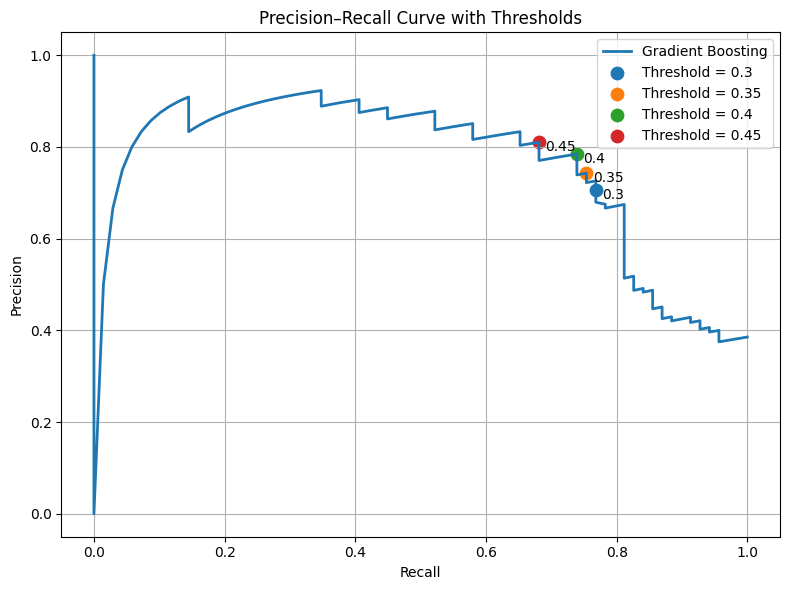

In [298]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, thresholds = precision_recall_curve(y3_test, y_prob_gb)

thresholds_to_mark = [0.30, 0.35, 0.40, 0.45]

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, lw=2, label="Gradient Boosting")

for t in thresholds_to_mark:
    idx = np.argmin(np.abs(thresholds - t))
    plt.scatter(
        recall_vals[idx],
        precision_vals[idx],
        s=80,
        label=f"Threshold = {t}"
    )
    plt.text(
        recall_vals[idx] + 0.01,
        precision_vals[idx] - 0.02,
        f"{t}",
        fontsize=10
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve with Thresholds")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Precision–Recall Curve (Clean View)

This cell plots the full **Precision–Recall curve** for the Gradient Boosting model without threshold markers, giving a clean view of the overall trade-off.

**Impact:** The smooth curve shows the full range of operating points available. A curve closer to the top-right corner indicates better model performance. This complements the threshold-marked curve above by showing the complete picture.

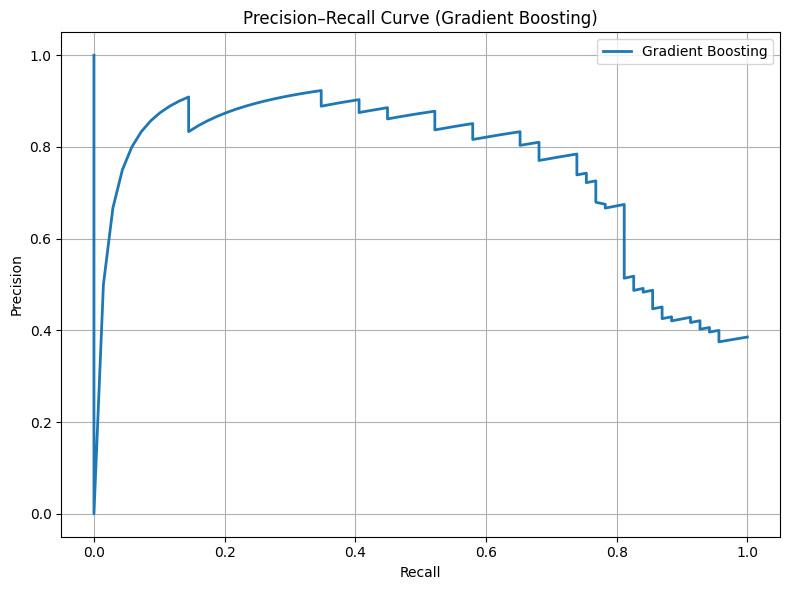

In [299]:
y_prob_clean = gb.predict_proba(x3_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y3_test, y_prob_clean)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label="Gradient Boosting")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Gradient Boosting)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Confusion Matrix — Gradient Boosting

The confusion matrix breaks down the model's predictions into four categories:
- **True Negatives (top-left):** Correctly predicted "Not Survived"
- **False Positives (top-right):** Incorrectly predicted "Survived" (Type I error)
- **False Negatives (bottom-left):** Missed actual survivors (Type II error)
- **True Positives (bottom-right):** Correctly predicted "Survived"

**Impact:** This visualization reveals where the model makes mistakes. With Gradient Boosting's high precision (~82%), we expect fewer false positives compared to Random Forest. However, the lower recall (~65%) means more false negatives — actual survivors the model fails to identify. This is the key trade-off of the Gradient Boosting model at the default threshold.

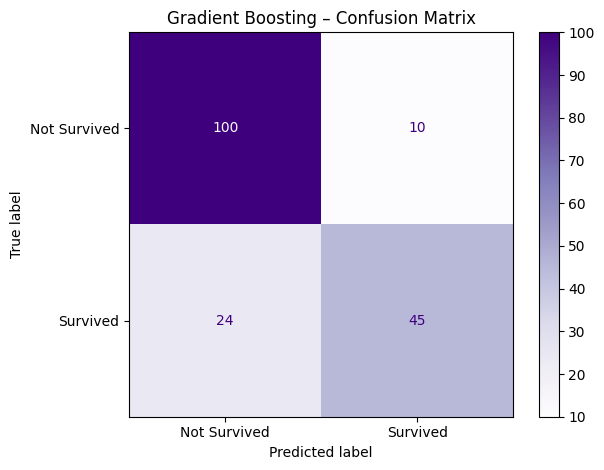

In [301]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y3_test, y_pred_gb)
ConfusionMatrixDisplay(
    cm,
    display_labels=["Not Survived", "Survived"]
).plot(cmap="Purples")

plt.title("Gradient Boosting – Confusion Matrix")
plt.tight_layout()
plt.show()


#